# Digit Recognizer

## Table of Contents
* [Introduction](#Introduction)
* [Data Preparation](#Data_Preparation)
    * [Importing the data](#Variance)
    * [Checking for missing values](#Missing)
    * [One hot encoding](#Onehot)
    * [Normalizing the data](#Codingpca)
* [Building the Models](#Building_the_Models)
    * [Simple model with data in array](#section_2_1)
    * [Simple model with data in matrix](#sub_section_2_1_1)
    * [Convolutional model](#sub_section_2_1_2)
* [Training the Models using Data Augmentation](#Training_the_Models_using_Data_Augmentation)
* [Evaluation of Models](#Evaluation_of_Models)
    * [Validation Curves](#section_3_1)
    * [Confusion Matrices](#sub_section_3_1_1)
* [Submissions](#Submissions)

## 1. Introduction <a class="anchor" id="Introduction"></a>

Here we present how different Neural Networks are predicting the digit shown in an image. We build, train and test 3 neural networks:
* Neural Network with image feeded as matrix: simple training set 0.97485, data augmentation 0.98317
* Neural Network with image feeded as an array: simple training set 0.97321, data augmentation 
* Convolutional Neural Network with image feeded as matrix: simple training set 0.99257, data augmentation 0.98317.

They all have 3 layers, and are trained with the same data using 20 epochs. It is interesting to note that the convolutional neural network did better without data augmentation, this could be because the model is overfitting eventhough we are changing the input images through data augmentation. It may just be because the model luckily turned out better with less data.  

Also, one final observation is that when testing the model on the validation set the convolutional neural network was the one that seemed to overfit the most the training data. However it was still better on the validation test than the other models.


## 2. Data Preparation <a class="anchor" id="Data_Preparation"></a>

### 2.1. Loading the data

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
dtrain = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
dtest = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [59]:
dtrain

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
dtest

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.2. Checking for missing values

In [61]:
for i in dtrain.isnull().any():
    if i == True:
        print(i) #Checking if there is any null values in the training set

There's no null values in the training set.

In [62]:
for i in dtest.isnull().any():
    if i == True:
        print(i) #Checking if there is any null values in the test set

There's no null values in the test set.

Note from the dataset that for each image we have 784 pixels, this is because in the competition description we are told that the images are 28x28 pixel images. Hence lets transform the 784 length arrays into 28 by 28 matrixes. These describe better the images. First we must drop the label column in the training data.

In [63]:
Y_train = dtrain["label"]
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

There's a similar amount of images for each digit, which is good for training our model.


### 2.3. One hot encoding

In [64]:
from sklearn.preprocessing import OneHotEncoder

In [65]:
ohe = OneHotEncoder()
onehottrain = ohe.fit_transform(dtrain[['label']]).toarray()
onehottrain

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [66]:
features_labels = ohe.categories_ 
print(features_labels)

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])]


In [67]:
onehotfeatures = pd.DataFrame(np.array(onehottrain), columns= features_labels)
Y_train = onehotfeatures

In [68]:
X_dtrain = dtrain.drop('label', axis = 1)

In [69]:
X_dtrain.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### 2.4. Normalization

We normalize the pixel values, since this makes the neural network perform better. 

In [70]:
X_dtrain_normalized = X_dtrain / 255.0
dtest_normalized = dtest / 255.0

In [71]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train_matrix = X_dtrain_normalized.values.reshape(-1,28,28,1)
dtest_matrix = dtest_normalized.values.reshape(-1,28,28,1)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
# Split the train and the validation set for the fitting
X_train0, X_val0, Y_train0, Y_val0 = train_test_split(X_train_matrix, Y_train.values, test_size = 0.1, random_state=2)
X_train1, X_val1, Y_train1, Y_val1 = train_test_split(X_dtrain_normalized.values, Y_train.values, test_size = 0.1, random_state=2)

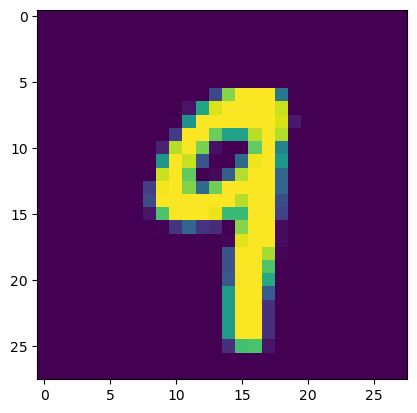

In [74]:
plt.imshow(X_train0[2][:,:,0])

In [75]:
X_train1.shape

(37800, 784)

## 3. Building & Training the Models <a class="anchor" id="Building_the_Models"></a>

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Reshape, Flatten
from tensorflow.keras.activations import linear, relu, sigmoid

### 3.1. Simple model with data in array

In [77]:
tf.random.set_seed(1234) # for consistent results
simplemodel = Sequential(
    [        
        tf.keras.Input(shape=(784,)),     # This specifies the shape our training set elements
        tf.keras.layers.Dense(256, activation='relu', name = "L1"), #  
        tf.keras.layers.Dense(15, activation='relu',  name = "L2"), #   
        tf.keras.layers.Dense(10, activation='softmax', name = "L3"),  #  
    ], name = "model" 
)
simplemodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 256)               200960    
                                                                 
 L2 (Dense)                  (None, 15)                3855      
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 204,975
Trainable params: 204,975
Non-trainable params: 0
_________________________________________________________________


In [78]:
simplemodel.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
     metrics=["accuracy"]
)
# from_logits=True creates a softmax function and .Adam chooses the Adaptive Moment optimizer.
# I use 'categorical_crossentropy' instead of sparse categorical_crossentropy because we have onehotencoded the data
# metrics=['accuracy'] makes the model calculate its own accuracy automatically (Stored in .history)
simplemodeldataaug = simplemodel

In [79]:
Y_train1.shape

(37800, 10)

In [80]:
simple = simplemodel.fit(X_train1, Y_train1, validation_data = (X_val1,Y_val1), epochs = 20)

Epoch 1/20
1182/1182 [==============================] - 5s 4ms/step - loss: 0.3005 - accuracy: 0.9112 - val_loss: 0.1535 - val_accuracy: 0.9581
Epoch 2/20
1182/1182 [==============================] - 4s 4ms/step - loss: 0.1196 - accuracy: 0.9636 - val_loss: 0.1379 - val_accuracy: 0.9600
Epoch 3/20
1182/1182 [==============================] - 4s 3ms/step - loss: 0.0775 - accuracy: 0.9762 - val_loss: 0.1089 - val_accuracy: 0.9679
Epoch 4/20
1182/1182 [==============================] - 4s 4ms/step - loss: 0.0565 - accuracy: 0.9823 - val_loss: 0.1032 - val_accuracy: 0.9693
Epoch 5/20
1182/1182 [==============================] - 4s 4ms/step - loss: 0.0436 - accuracy: 0.9862 - val_loss: 0.1079 - val_accuracy: 0.9724
Epoch 6/20
1182/1182 [==============================] - 4s 4ms/step - loss: 0.0325 - accuracy: 0.9894 - val_loss: 0.0957 - val_accuracy: 0.9731
Epoch 7/20
1182/1182 [==============================] - 4s 4ms/step - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.0953 - val_accuracy:

### 3.2. Simple model with data in matrix

In [81]:
tf.random.set_seed(1234) # for consistent results
matrixmodel = Sequential(
    [        
        tf.keras.Input(shape=(28,28)),     # This specifies the shape our training set elements
        Flatten(),
        tf.keras.layers.Dense(256, activation='relu', name = "L1"), #  
        tf.keras.layers.Dense(15, activation='relu',  name = "L2"), #   
        tf.keras.layers.Dense(10, activation='softmax', name = "L3"),  #  
    ], name = "model" 
)
matrixmodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 L1 (Dense)                  (None, 256)               200960    
                                                                 
 L2 (Dense)                  (None, 15)                3855      
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 204,975
Trainable params: 204,975
Non-trainable params: 0
_________________________________________________________________


In [82]:
matrixmodel.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
     metrics=["accuracy"]
)
# from_logits=True creates a softmax function and .Adam chooses the Adaptive Moment optimizer.
# I use 'categorical_crossentropy' instead of sparse categorical_crossentropy because we have onehotencoded the data
matrixmodeldataaug = matrixmodel

In [83]:
matrix = matrixmodel.fit(X_train0, Y_train0, validation_data = (X_val0,Y_val0), epochs = 20)

Epoch 1/20
1182/1182 [==============================] - 5s 4ms/step - loss: 0.3265 - accuracy: 0.9046 - val_loss: 0.1537 - val_accuracy: 0.9543
Epoch 2/20
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1174 - accuracy: 0.9655 - val_loss: 0.1131 - val_accuracy: 0.9662
Epoch 3/20
1182/1182 [==============================] - 4s 4ms/step - loss: 0.0788 - accuracy: 0.9765 - val_loss: 0.1039 - val_accuracy: 0.9679
Epoch 4/20
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0561 - accuracy: 0.9822 - val_loss: 0.0995 - val_accuracy: 0.9721
Epoch 5/20
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0425 - accuracy: 0.9869 - val_loss: 0.1073 - val_accuracy: 0.9702
Epoch 6/20
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0788 - val_accuracy: 0.9800
Epoch 7/20
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0255 - accuracy: 0.9916 - val_loss: 0.0987 - val_accuracy:

### 3.3. Convolutional model with data in matrix

In [84]:

convmodel = Sequential([
  tf.keras.Input(shape=(28,28,1)),
  tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
  Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax', name = "L3")
])
convmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               802944    
                                                                 
 L3 (Dense)                  (None, 10)                1290      
                                                                 
Total params: 805,066
Trainable params: 805,066
Non-trainable params: 0
________________________________________________

In [85]:
convmodel.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
     metrics=["accuracy"]
)
convmodeldataaug = convmodel

In [86]:
print(X_train0[0].shape)

(28, 28, 1)


In [87]:
print(Y_train0[0].shape)

(10,)


In [88]:
conv = convmodel.fit(X_train0, Y_train0, validation_data = (X_val0,Y_val0), epochs = 20)

Epoch 1/20
1182/1182 [==============================] - 18s 15ms/step - loss: 0.1687 - accuracy: 0.9507 - val_loss: 0.0615 - val_accuracy: 0.9810
Epoch 2/20
1182/1182 [==============================] - 17s 15ms/step - loss: 0.0535 - accuracy: 0.9832 - val_loss: 0.0673 - val_accuracy: 0.9783
Epoch 3/20
1182/1182 [==============================] - 17s 15ms/step - loss: 0.0328 - accuracy: 0.9890 - val_loss: 0.0727 - val_accuracy: 0.9774
Epoch 4/20
1182/1182 [==============================] - 17s 15ms/step - loss: 0.0225 - accuracy: 0.9925 - val_loss: 0.0516 - val_accuracy: 0.9855
Epoch 5/20
1182/1182 [==============================] - 17s 15ms/step - loss: 0.0163 - accuracy: 0.9941 - val_loss: 0.0510 - val_accuracy: 0.9879
Epoch 6/20
1182/1182 [==============================] - 17s 14ms/step - loss: 0.0118 - accuracy: 0.9958 - val_loss: 0.0529 - val_accuracy: 0.9871
Epoch 7/20
1182/1182 [==============================] - 17s 15ms/step - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.0544 -

## 4. Training the Models using Data Augmentation <a class="anchor" id="Training_the_Models_using_Data_Augmentation"></a>

Data augmentation is a method to increase the traing set size, it makes the model be able to adapt better for different types of inputs. We can do data augmentation here since one can edit images (rotate, filter,...) in training set to get new images and include them in the training set. 

In [89]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [90]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen1 = datagen
datagen.fit(X_train0)

In [91]:
# Fit the models
matrixdataaug_hist = matrixmodeldataaug.fit_generator(datagen.flow(X_train0,Y_train0, batch_size=90),
                               validation_data = (X_val0,Y_val0), epochs =20,  steps_per_epoch=X_train0.shape[0] // 90
                              )
convdataaug_hist = convmodeldataaug.fit_generator(datagen.flow(X_train0,Y_train0, batch_size=90),
                             validation_data = (X_val0,Y_val0),
                              epochs = 20, steps_per_epoch=X_train0.shape[0] // 90
                              )

Epoch 1/20


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


420/420 [==============================] - 11s 25ms/step - loss: 0.4291 - accuracy: 0.8903 - val_loss: 0.0881 - val_accuracy: 0.9767
Epoch 2/20
420/420 [==============================] - 10s 24ms/step - loss: 0.2326 - accuracy: 0.9321 - val_loss: 0.0844 - val_accuracy: 0.9771
Epoch 3/20
420/420 [==============================] - 11s 25ms/step - loss: 0.1903 - accuracy: 0.9431 - val_loss: 0.0836 - val_accuracy: 0.9776
Epoch 4/20
420/420 [==============================] - 11s 25ms/step - loss: 0.1704 - accuracy: 0.9489 - val_loss: 0.0808 - val_accuracy: 0.9779
Epoch 5/20
420/420 [==============================] - 10s 25ms/step - loss: 0.1508 - accuracy: 0.9551 - val_loss: 0.0813 - val_accuracy: 0.9771
Epoch 6/20
420/420 [==============================] - 10s 24ms/step - loss: 0.1418 - accuracy: 0.9569 - val_loss: 0.0786 - val_accuracy: 0.9788
Epoch 7/20
420/420 [==============================] - 10s 25ms/step - loss: 0.1343 - accuracy: 0.9594 - val_loss: 0.0733 - val_accuracy: 0.9771
Epo

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


420/420 [==============================] - 15s 35ms/step - loss: 0.1746 - accuracy: 0.9493 - val_loss: 0.0437 - val_accuracy: 0.9869
Epoch 2/20
420/420 [==============================] - 15s 36ms/step - loss: 0.0878 - accuracy: 0.9738 - val_loss: 0.0445 - val_accuracy: 0.9874
Epoch 3/20
420/420 [==============================] - 15s 36ms/step - loss: 0.0686 - accuracy: 0.9789 - val_loss: 0.0453 - val_accuracy: 0.9869
Epoch 4/20
420/420 [==============================] - 15s 35ms/step - loss: 0.0581 - accuracy: 0.9818 - val_loss: 0.0372 - val_accuracy: 0.9893
Epoch 5/20
420/420 [==============================] - 15s 36ms/step - loss: 0.0519 - accuracy: 0.9836 - val_loss: 0.0380 - val_accuracy: 0.9886
Epoch 6/20
420/420 [==============================] - 15s 35ms/step - loss: 0.0508 - accuracy: 0.9846 - val_loss: 0.0357 - val_accuracy: 0.9893
Epoch 7/20
420/420 [==============================] - 15s 36ms/step - loss: 0.0441 - accuracy: 0.9863 - val_loss: 0.0347 - val_accuracy: 0.9910
Epo

## 5. Evaluation of Models <a class="anchor" id="Evaluation_of_Models"></a>

### 5.1. Validation curves

In [92]:
history_dict1 = simple.history
print(history_dict1.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


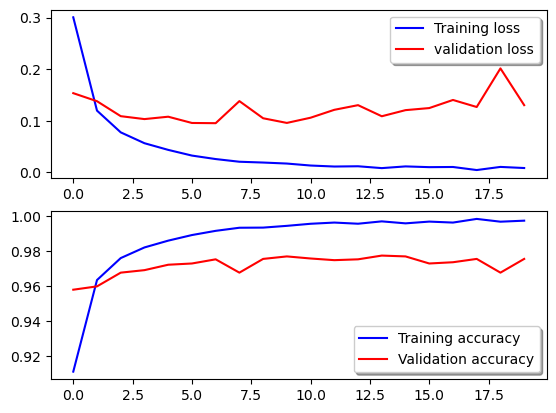

In [93]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(simple.history['loss'], color='b', label="Training loss")
ax[0].plot(simple.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(simple.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(simple.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [94]:
history_dict0 = matrix.history
print(history_dict0.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


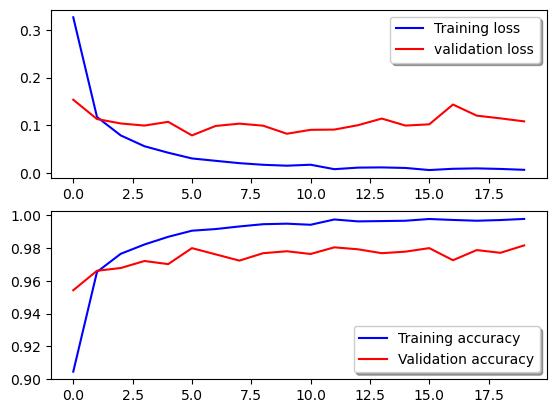

In [95]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(matrix.history['loss'], color='b', label="Training loss")
ax[0].plot(matrix.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(matrix.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(matrix.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [96]:
history_dictconv = conv.history
print(history_dictconv.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


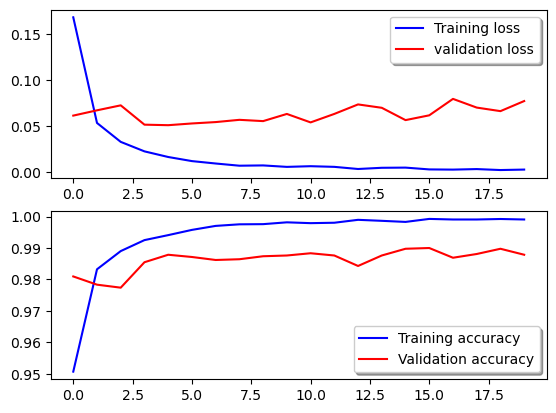

In [97]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(conv.history['loss'], color='b', label="Training loss")
ax[0].plot(conv.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(conv.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(conv.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

From the graphs we can observe there is overfitting. We could perform some chages in the training method to prevent this.

### 5.2. Confusion Matrices

In [98]:
from sklearn.metrics import confusion_matrix
import itertools

132/132 [==============================] - 0s 1ms/step


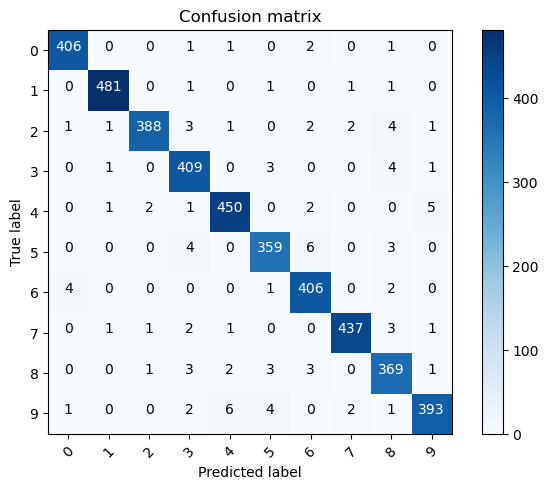

In [99]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = simplemodel.predict(X_val1)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val1,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

132/132 [==============================] - 0s 2ms/step


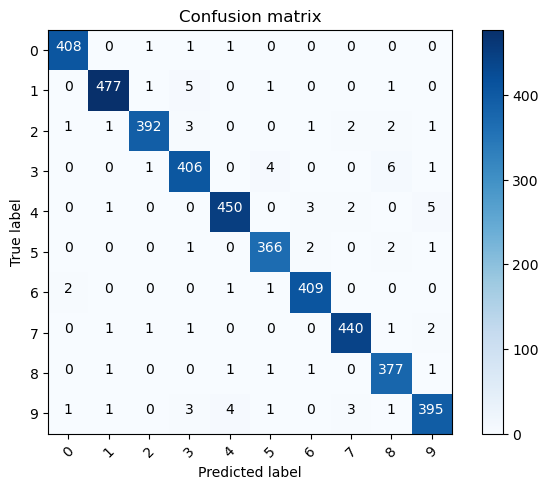

In [100]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = matrixmodeldataaug.predict(X_val0)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val0,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

132/132 [==============================] - 1s 5ms/step


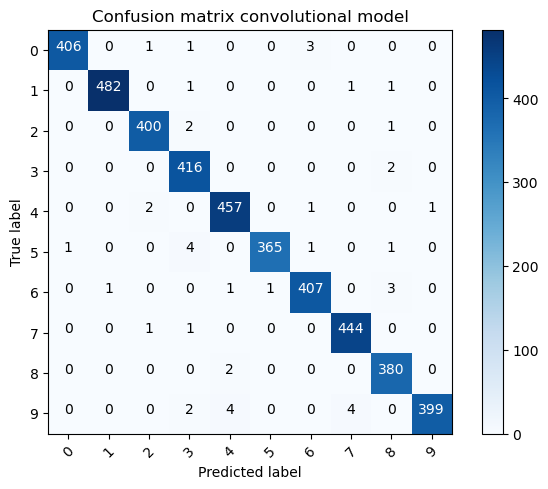

In [101]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix convolutional model',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = convmodeldataaug.predict(X_val0)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val0,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

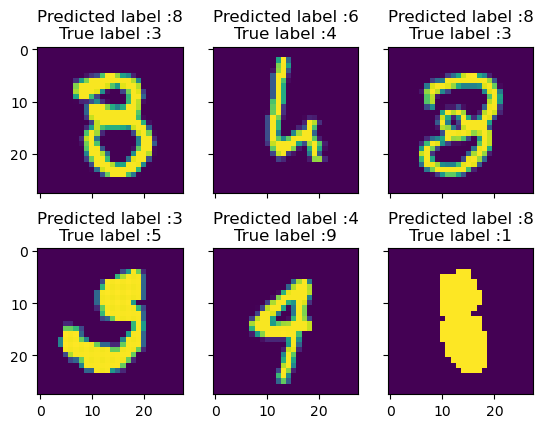

In [102]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val1[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

## 6. Submissions <a class="anchor" id="Submissions"></a>

In [103]:
# predict results
results1 = simplemodel.predict(dtest_normalized)

# select the indix with the maximum probability
predictions1 = np.argmax(results1,axis = 1)

predictions1 = pd.Series(predictions1,name="Label")

875/875 [==============================] - 1s 1ms/step


In [104]:
# predict results
results0 = matrixmodel.predict(dtest_matrix)

# select the indix with the maximum probability
predictions0 = np.argmax(results0,axis = 1)

predictions0 = pd.Series(predictions0,name="Label")

875/875 [==============================] - 2s 2ms/step


In [105]:
# predict results
resultsconv = convmodel.predict(dtest_matrix)

# select the indix with the maximum probability
predictionsconv = np.argmax(resultsconv,axis = 1)

predictionsconv = pd.Series(predictionsconv,name="Label")

875/875 [==============================] - 5s 5ms/step


In [106]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predictions1],axis = 1)
submission.to_csv("submission.csv",index=False)

In [107]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predictions0],axis = 1)
submission.to_csv("submission0.csv",index=False)

In [108]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predictionsconv],axis = 1)
submission.to_csv("submissionconv.csv",index=False)

In [109]:
# predict results
results = matrixmodeldataaug.predict(dtest_matrix)

# select the indix with the maximum probability
predictions = np.argmax(results,axis = 1)

predictions = pd.Series(predictions,name="Label")

875/875 [==============================] - 1s 2ms/step


In [110]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predictions],axis = 1)
submission.to_csv("submissionmatrixdataaug.csv",index=False)

In [111]:
# predict results
results = convmodeldataaug.predict(dtest_matrix)

# select the indix with the maximum probability
predictions = np.argmax(results0,axis = 1)

predictions = pd.Series(predictions,name="Label")

875/875 [==============================] - 5s 5ms/step


In [112]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predictions],axis = 1)
submission.to_csv("submissionconvdataaug.csv",index=False)